In [1]:
from centigrad.nn import Module, Linear, Tanh
from centigrad.losses import MSELoss
from utils.trace_graph import draw_dot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xs = np.random.randn(4, 3)
ys = np.array([1.0, -1.0, -1.0, 1.0])

In [3]:
class BobNet(Module):
    def __init__(self):
        self.l1 = Linear(3, 4, low=-1.0)
        self.a1 = Tanh()
        self.l2 = Linear(4, 4, low=-1.0)
        self.a2 = Tanh()
        self.l3 = Linear(4, 1, low=-1.0)
        self.a3 = Tanh()
    def forward(self, inputs: np.ndarray):
        out = self.l1.forward(inputs)
        out = self.a1.forward(out)
        out = self.l2.forward(out)
        out = self.a2.forward(out)
        out = self.l3.forward(out)
        out = self.a3.forward(out)
        return out
    def parameters(self):
        params = []
        params.extend(self.l1.parameters())
        params.extend(self.l2.parameters())
        params.extend(self.l3.parameters())
        return params
    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0.0
    def update(self):
        for p in model.parameters():
            p.data += -0.1 * p.grad

In [4]:
model = BobNet()
loss_function = MSELoss()
losses = []

In [5]:
for k in range(100):
    out = np.array([model.forward(x) for x in xs])
    loss = loss_function(out.reshape(-1), ys)
    model.zero_grad()
    loss.backward()
    model.update()
    losses.append(loss.data)
    if k % 10 == 0: print(f"loss at {k} steps: {loss.data}")

loss at 0 steps: 1.6273772995419464
loss at 10 steps: 0.6177459196018674
loss at 20 steps: 0.3725761640716881
loss at 30 steps: 0.14155501548462024
loss at 40 steps: 0.057143758125502576
loss at 50 steps: 0.031616621112428085
loss at 60 steps: 0.020898875333689157
loss at 70 steps: 0.01527768633503116
loss at 80 steps: 0.011893110368479518
loss at 90 steps: 0.00966025532397293


[Value(data=0.9100281230603099, grad=-0.044985938469845055)
 Value(data=-0.8936128740386571, grad=0.05319356298067146)
 Value(data=-0.9346738428041534, grad=0.03266307859792328)
 Value(data=0.9039840975940674, grad=-0.048007951202966304)]


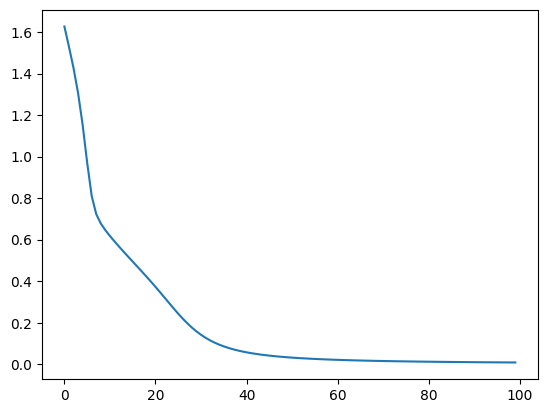

In [6]:
draw_dot(loss)
plt.plot(losses)
print(out.reshape(-1))